<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Template" data-toc-modified-id="Project-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Template</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li></ul></li></ul></div>

# Project Template

Group Number =   34

Group Members:

Names                                Student IDs


## Task-1

In [1]:
##
# Prepare the data, i.e., handle the missing values, remove outliers, and fix inconsistencies.
# You can pick any methods, but clearly justify your approach.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Reading the data
df = pd.read_csv("Group_34_a.csv")
dfb = pd.read_csv("Group_34_b.csv")
df = df.drop('0', axis=1)

#====================== Changing Cost/day and Profit/day into numerical data (float) ===========
df["Cost/day"] = df["Cost/day"].apply(lambda x: float(x.replace("SAR", "")))
df["Profit/day"] = df["Profit/day"].apply(lambda x: float(x.replace("SAR", "")))

dfb["Cost/day"] = dfb["Cost/day"].apply(lambda x: float(x.replace("SAR", "")))
dfb["Profit/day"] = dfb["Profit/day"].apply(lambda x: float(x.replace("SAR", "")))

#===============================================================================================

#================== Fixing inconsistency in Days column ========================================
daysMapping = {"Sun": "Sunday",
               "Mon": "Monday",
               "Tue": "Tuesday",
               "Wed": "Wednesday",
               "Thu": "Thursday",
               "Fri": "Friday",
               "Sat": "Saturday"}
df["Day"] = df["Day"].apply(lambda x: daysMapping[x] if x in daysMapping.keys() else x)
#===============================================================================================

#================== Fixing inconsistency in Greg. Month column =================================
monthMapping = {"Aug": "August",
                "Sep": "September",
                "Oct": "October",
                "Nov": "November",
                "Dec": "December",
                "Jan": "January",
                "Feb": "February",
                "Mar": "March",
                "Apr": "April",
                "Jun": "June",
                "Jul": "July",
                "May": "May"}




df["Greg. Month"] = df["Greg. Month"].apply(lambda x: monthMapping[x] if x in monthMapping.keys() else x)
#===============================================================================================


#====================== Handling missing days ==================================================
nullDays = df["Day"].isna()
dates = df.loc[nullDays, "Gregorian Date"].unique().tolist()
for date in dates:
    condition = (df["Gregorian Date"] == date) & (df["Day"].notnull())
    day = df.loc[condition, "Day"].tolist()
    dfIndex = df[(df["Gregorian Date"] == date)].index.tolist()
    df.loc[dfIndex, "Day"] = day[0]
#================================================================================================


#======================= Handling missing months ================================================

monthMapping2 = {"01": "January",
                "02": "February",
                "03": "March",
                "04": "April",
                "05": "May",
                "06": "June",
                "07": "July",
                "08": "August",
                "09": "September",
                "10": "Octobor",
                "11": "November",
                "12": "December"}
def f(row):
    x = monthMapping2[row["Gregorian Date"][5:7]]
    return x
        
df["Greg. Month"] = df.apply(f, axis=1)


#======================= Handling missing Store locations ================================================

nullLocation = df["Location"].isna()

nullLocations = df["Location"].isna()
IDs = df.loc[nullLocations, "Store ID"].unique().tolist()
for ID in IDs:
    condition = (df["Store ID"] == ID) & (df["Location"].notnull())
    location = df.loc[condition, "Location"].tolist()
    dfIndex = df[(df["Store ID"] == ID)].index.tolist()
    df.loc[dfIndex, "Location"] = location[0]
#================================================================================================


    
#======================= Handling missing Store sizes ================================================

nullSizes = df["Store Size"].isna()
IDs = df.loc[nullSizes, "Store ID"].unique().tolist()
for ID in IDs:
    condition = (df["Store ID"] == ID) & (df["Store Size"].notnull())
    size = df.loc[condition, "Store Size"].tolist()
    dfIndex = df[(df["Store ID"] == ID)].index.tolist()
    df.loc[dfIndex, "Store Size"] = size[0]

display(df)

FileNotFoundError: [Errno 2] File Group_34_b.csv does not exist: 'Group_34_b.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store ID        8019 non-null   object 
 1   Gregorian Date  8019 non-null   object 
 2   Hijri Date      8019 non-null   object 
 3   Day             8019 non-null   object 
 4   Greg. Month     8019 non-null   object 
 5   Hijri Month     8019 non-null   object 
 6   Location        8019 non-null   object 
 7   Store Size      8019 non-null   object 
 8   Parking         8019 non-null   int64  
 9   Mall            8019 non-null   object 
 10  Work Hours      8019 non-null   object 
 11  Cost/day        8019 non-null   float64
 12  Promotion       8019 non-null   object 
 13  Customer Base   8019 non-null   int64  
 14  Advertisements  8019 non-null   int64  
 15  Competition     8019 non-null   int64  
 16  Customers       8019 non-null   int64  
 17  Profit/day      8019 non-null   f

None



Store ID: fil-3401

Before removing outliers


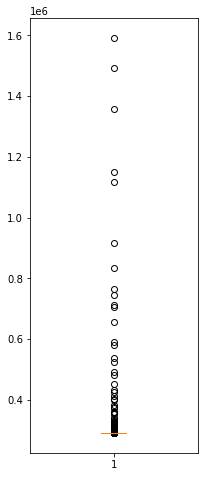

After removing outliers


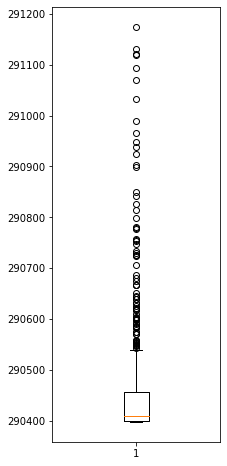



Store ID: fil-3402

Before removing outliers


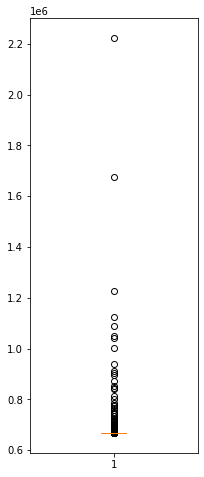

After removing outliers


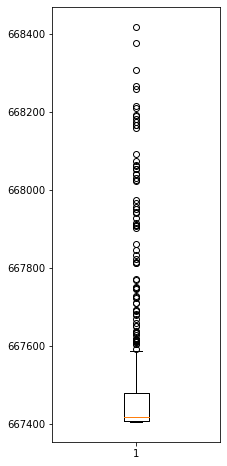



Store ID: fil-3403

Before removing outliers


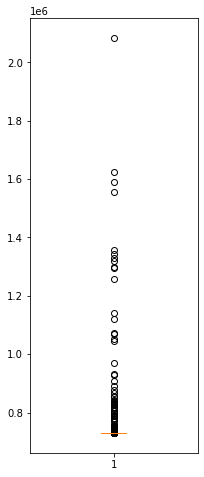

After removing outliers


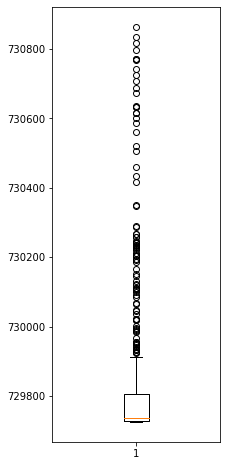



Store ID: fil-3404

Before removing outliers


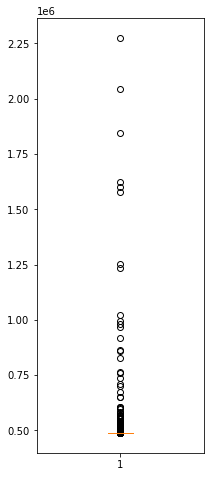

After removing outliers


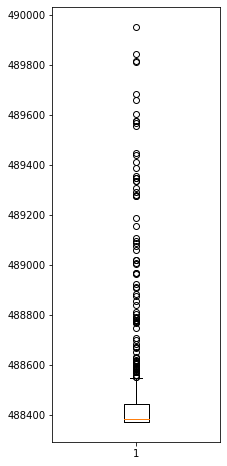



Store ID: fil-3405

Before removing outliers


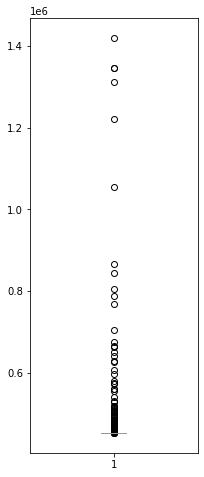

After removing outliers


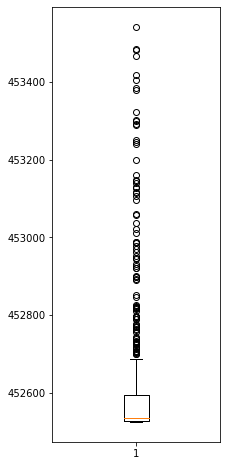



Store ID: fil-3406

Before removing outliers


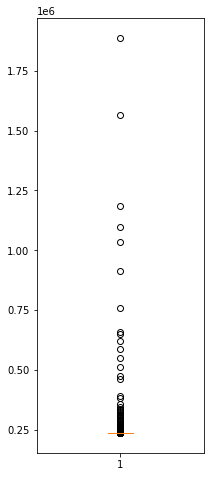

After removing outliers


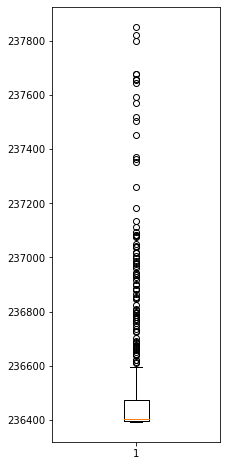



Store ID: fil-3407

Before removing outliers


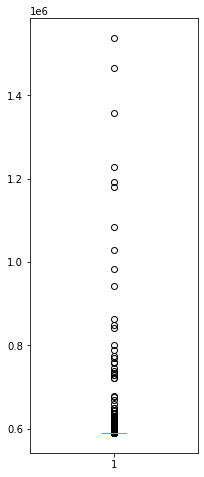

After removing outliers


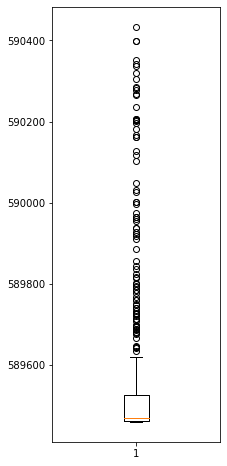



Store ID: fil-3408

Before removing outliers


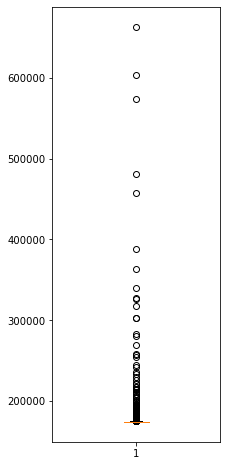

After removing outliers


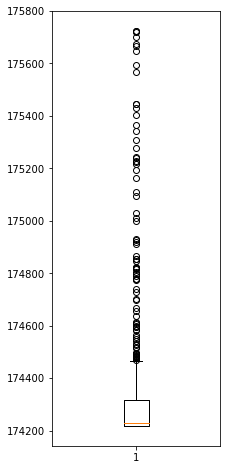



Store ID: fil-3409

Before removing outliers


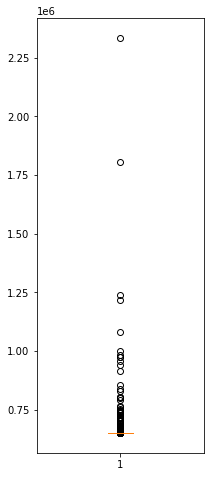

After removing outliers


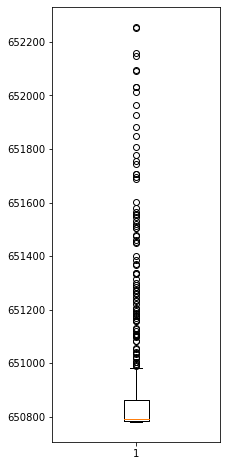



Store ID: fil-3410

Before removing outliers


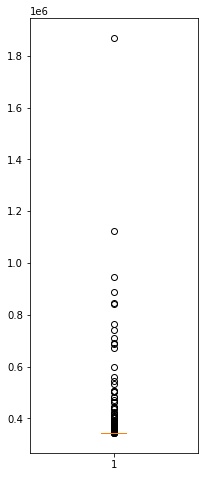

After removing outliers


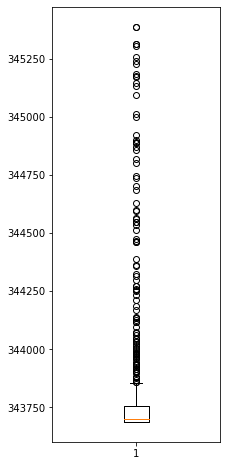



Store ID: fil-3411

Before removing outliers


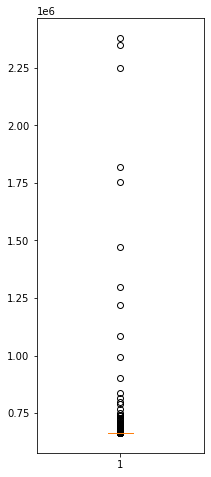

After removing outliers


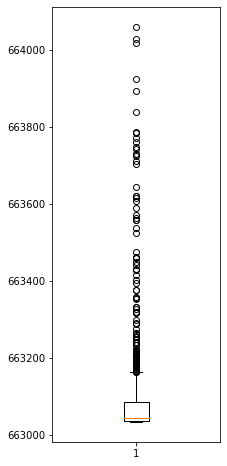

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6436 entries, 0 to 8018
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store ID        6436 non-null   object 
 1   Gregorian Date  6436 non-null   object 
 2   Hijri Date      6436 non-null   object 
 3   Day             6436 non-null   object 
 4   Greg. Month     6436 non-null   object 
 5   Hijri Month     6436 non-null   object 
 6   Location        6436 non-null   object 
 7   Store Size      6436 non-null   object 
 8   Parking         6436 non-null   int64  
 9   Mall            6436 non-null   object 
 10  Work Hours      6436 non-null   object 
 11  Cost/day        6436 non-null   float64
 12  Promotion       6436 non-null   object 
 13  Customer Base   6436 non-null   int64  
 14  Advertisements  6436 non-null   int64  
 15  Competition     6436 non-null   int64  
 16  Customers       6436 non-null   int64  
 17  Profit/day      6436 non-null   f

None

In [ ]:
# Outliers of Customer base:
# We have noticed that the customer base for each store isn't consistent throughout the days.
# So, we decided the remove the values higher than the upper whisker.
display(df.info())
for ID in df['Store ID'].unique().tolist():
    

    
# Boxplots for customer base bofore removing outliers
    selectedRows = (df['Store ID'] == ID)
    print("\n\nStore ID:",ID)
    print("\nBefore removing outliers")
    plt.figure(figsize=(3,8))
    plt.boxplot(df.loc[selectedRows, "Customer Base"]) 
    plt.show()
    
    indf = df[df['Store ID'] == ID]

    a = indf.loc[:, "Customer Base"].tolist()
    Q3, Q1 = np.percentile(a, [75 ,25])
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    selectedRows = (indf['Customer Base'] > upper) | (indf['Customer Base'] < lower)

    df.drop(indf[selectedRows].index, inplace=True)

    
    
# Boxplots for customer base after removing outliers
    selectedRows = (df['Store ID'] == ID)
    print("After removing outliers")
    plt.figure(figsize=(3,8))
    plt.boxplot(df.loc[selectedRows, "Customer Base"]) 
    plt.show()
    
# After removing the outliers from the customer base of each store, we looked through the other columns and concluded that
# there is no need to remove other values.

# We have removed 1,583 outliers from customer base

display(df.info())


## Task-2

<Figure size 432x288 with 0 Axes>

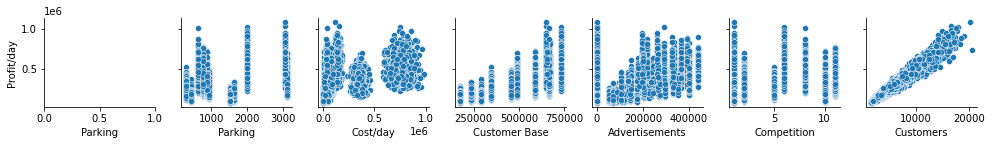

In [ ]:
# Draw the pair-wise plots between all the input variables and the output variable (profit).
plt.figure()
sns.pairplot(
    data=df,
    x_vars=['Parking', "Parking", 'Cost/day', 'Customer Base', 'Advertisements', 'Competition', 'Customers'],
    y_vars=["Profit/day"],
    aspect=1,
    height=2)
plt.show()

# We don't know why but the first column in x_vars always plots an empty graph, so we've added two Parking columns in x_vars
# to get around this problem.

## Task-3

In [ ]:
# Identify top three numerical variables that are strongly related to the profit variable? 
# Use the relevant analysis approach.

# We've used pearson method for correlation to find the variables that are related to the profit

corr = df.corr(method = 'pearson')
display(corr['Profit/day'].sort_values(ascending=False))
display(f'It seems the the top 3 highest variables (except with itself) are: Customers, Customer Base & Cost/day.')

Profit/day        1.000000
Customers         0.976809
Customer Base     0.735057
Cost/day          0.440946
Parking           0.322122
Advertisements    0.196579
Competition       0.055148
Name: Profit/day, dtype: float64

'It seems the the top 3 highest variables (except with itself) are: Customers, Customer Base & Cost/day.'

## Task-4

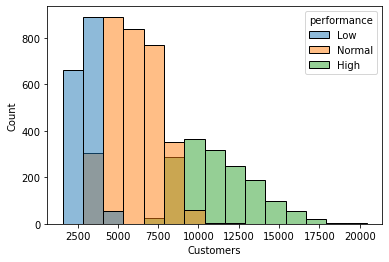

It is apparent from this graph that by using the customers column, we can seperate low and high performing stores.


In [ ]:
# Show if the input variables have the information to separate low and high per-forming stores? Use plots to justify.

a = df.loc[:, "Profit/day"].tolist()
Q3, Q1 = np.percentile(a, [75 ,25])

highPerforming = (df['Profit/day'] > Q3)
lowPerforming = (df['Profit/day'] < Q1)


def f(x):
    
    if x > Q3:
        return 'High'
    elif x < Q1:
        return 'Low'
    else:
        return 'Normal'

df['performance'] = df['Profit/day'].apply(f)

plt.figure()
sns.histplot(x="Customers", hue='performance', bins=15, data=df)
plt.show()


print("It is apparent from this graph that by using the customers column, we can seperate low and high performing stores.")

## Task-5

Low performing stores tend to be inside malls rather than having their own stores


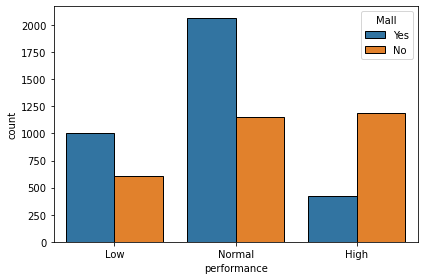

In [ ]:
# ARE WE SURE ABOUT THIS?

#Low-performing stores tend to be in malls (potential factor)
print("Low performing stores tend to be inside malls rather than having their own stores")
plt.figure()
sns.countplot(x = 'performance', hue = 'Mall', edgecolor = 'black', data = df)
plt.tight_layout()


Low perfoming stores tend to not have Hyper sized stores


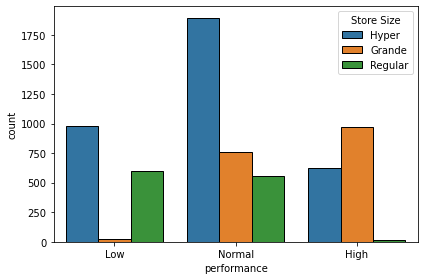

In [ ]:
# Low-performing stores do not tend to have Hyper store size
print("Low perfoming stores tend to not have Hyper sized stores")
plt.figure()
sns.countplot(x = 'performance', hue = 'Store Size', edgecolor = 'black', data = df)
plt.tight_layout()


As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.
This means that low performing stores tend to send less advertisements.


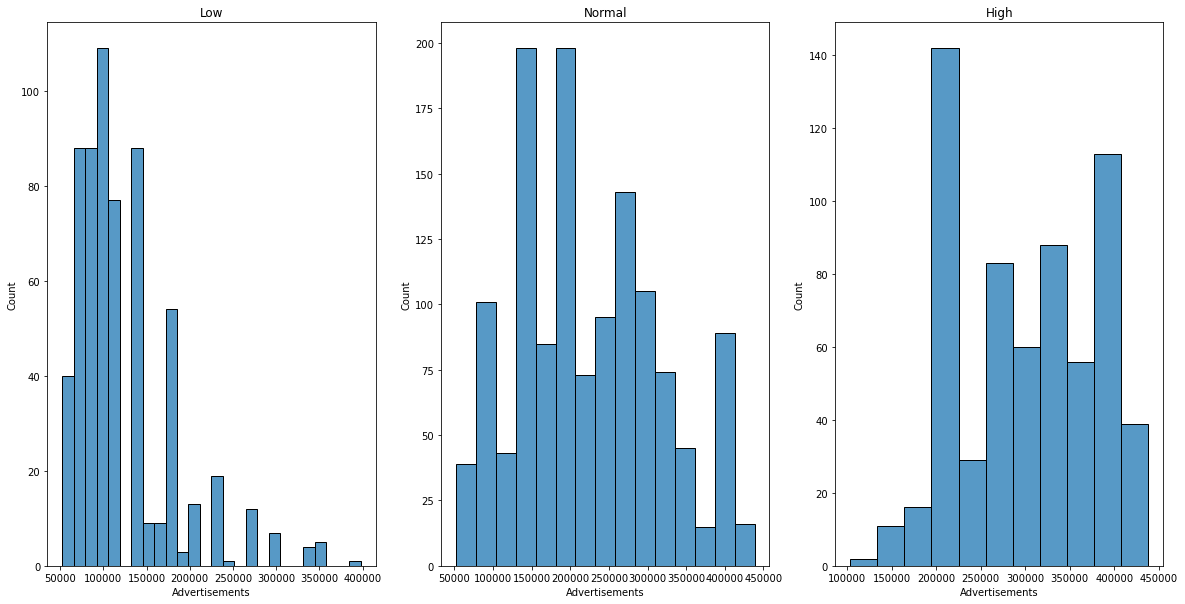

In [ ]:
# Low-performance stores tend to have less Advertisements
print("As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.")
print("This means that low performing stores tend to send less advertisements.")
fig,axes = plt.subplots(1, 3, figsize=(20,10))
for ind,col in enumerate(["Low", "Normal", "High"]):
    selectedRows =  (df['Promotion'] != 'None') & (df['performance'] == col)
    sns.histplot(x="Advertisements",data=df[selectedRows],ax=axes[ind])
    axes[ind].set_title(col)
plt.show()

As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.
This means that low performing stores tend to have a smaller customer base.


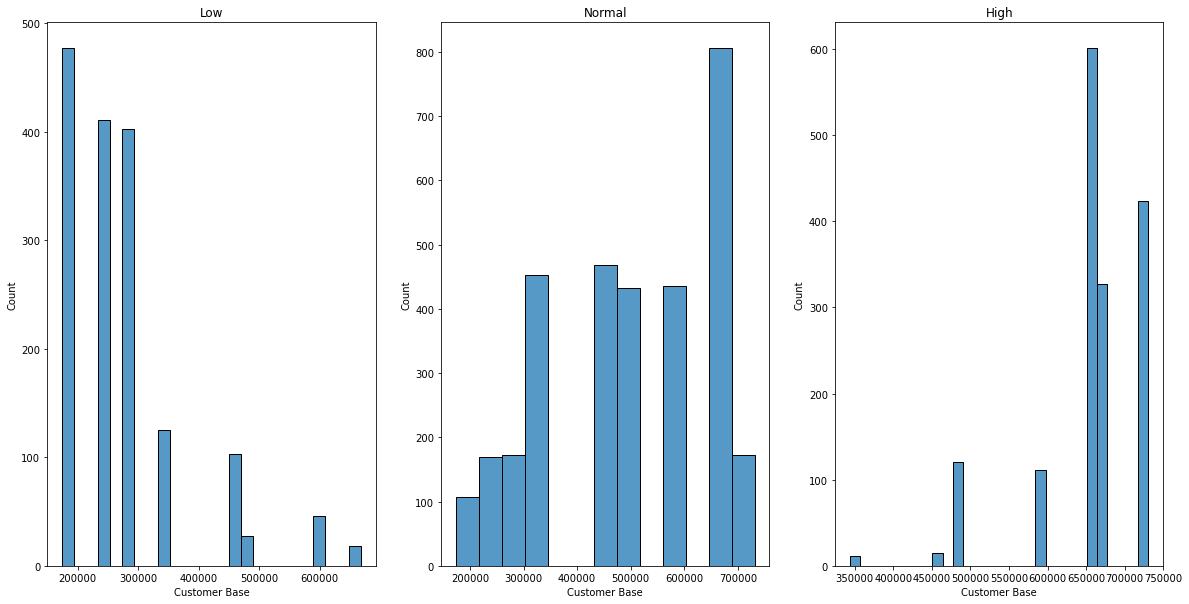

In [ ]:
# Low-performing stores tend to have Low Customer Base
print("As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.")
print("This means that low performing stores tend to have a smaller customer base.")
fig,axes = plt.subplots(1, 3, figsize=(20,10))
for ind,col in enumerate(["Low", "Normal", "High"]):
    selectedRows = (df['performance'] == col)
    sns.histplot(x="Customer Base",data=df[selectedRows],ax=axes[ind])
    axes[ind].set_title(col)
plt.show()

We can see from this graph that stores located in the outskirts tend to be low performing.
But there's only one store located in the outskirts in our data, which makes this observation incorrect.

The store in the outskirts is: fil-3408

But it also highlights that store fil-3408 needs more investigations to know why it is low performing, and to know if being in the outskirts affects its performance.


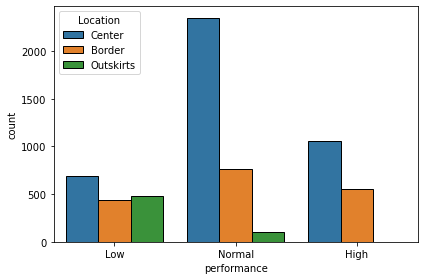

In [ ]:
#One store in the Outskirts is skewing the data (fil-3408)
print("We can see from this graph that stores located in the outskirts tend to be low performing.")
print("But there's only one store located in the outskirts in our data, which makes this observation incorrect.")
outskirt = df["Location"] == "Outskirts"
storeID = df.loc[outskirt,"Store ID"].unique()
print("\nThe store in the outskirts is:", storeID[0])

print("\nBut it also highlights that store fil-3408 needs more investigations to know why it is low performing," + 
      " and to know if being in the outskirts affects its performance.")


plt.figure()
sns.countplot(x = 'performance',hue = "Location", edgecolor = 'black', data = df)
plt.tight_layout()


## Task-6

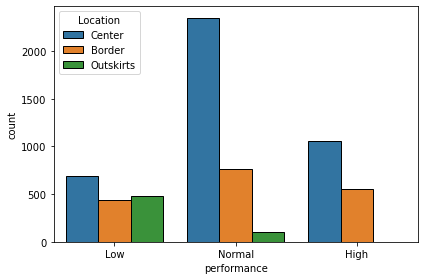

In [ ]:
# What are the common patterns for the high performance of the stores? Use plots to justify.


#================================== I suggest deleting this =================================
# High-performing stores do not have a store in Outskirts
plt.figure()
sns.countplot(x = 'performance', hue = 'Location', edgecolor = 'black', data = df)
plt.tight_layout()









High performing stores tend to have their own stand-alone stores.


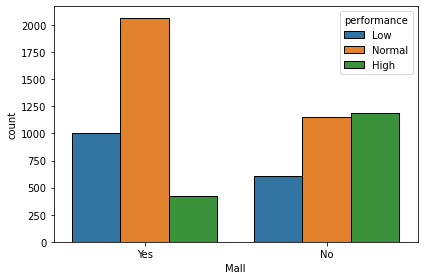

In [ ]:
# High-performing stores tend to be outside of malls
print("High performing stores tend to have their own stand-alone stores.")
plt.figure()
sns.countplot(x = 'Mall', hue = 'performance', edgecolor = 'black', data = df)
plt.tight_layout()

High performing store tend to have larger sizes, and almost none of them have a regular size


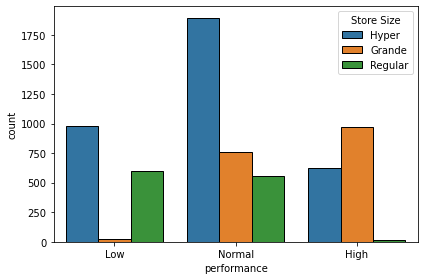

In [ ]:
# High-performing stores tend to have Grande size, and they nearly do not have regular size
print("High performing store tend to have larger sizes, and almost none of them have a regular size")
plt.figure()
sns.countplot(x = 'performance', hue = 'Store Size', edgecolor = 'black', data = df)
plt.tight_layout()

As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.
This means that High performing stores tend to have a larger customer base.


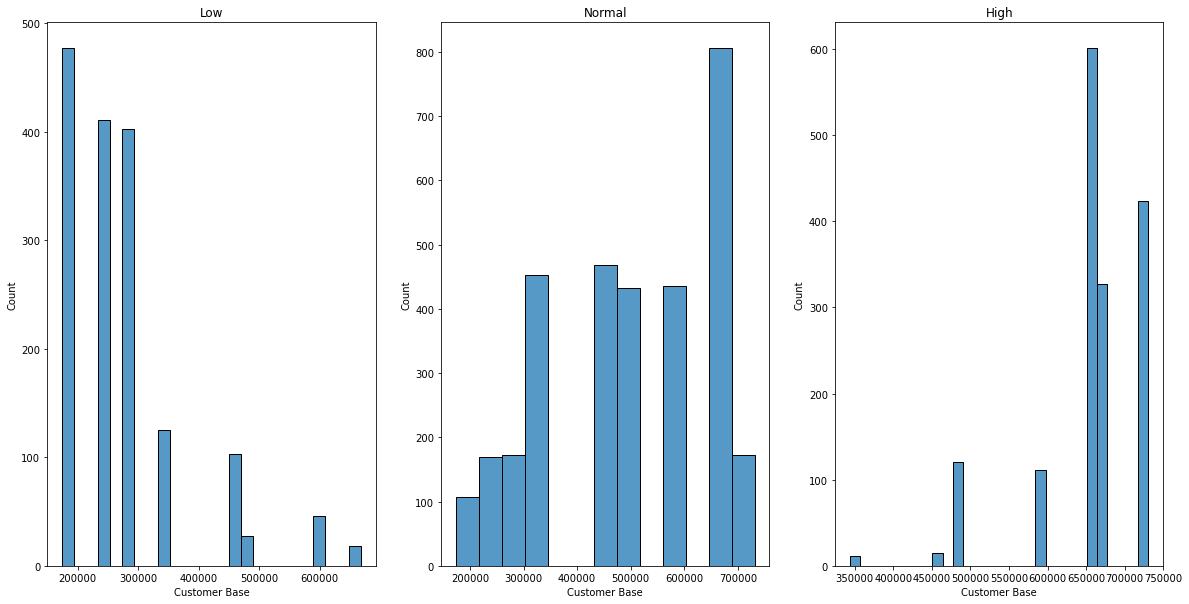

In [ ]:
# High-performing stores tend to have high Customer Base
print("As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.")
print("This means that High performing stores tend to have a larger customer base.")
fig,axes = plt.subplots(1, 3, figsize=(20,10))
for ind,col in enumerate(["Low", "Normal", "High"]):
    selectedRows = (df['performance'] == col)
    sns.histplot(x="Customer Base",data=df[selectedRows],ax=axes[ind])
    axes[ind].set_title(col)
plt.show()

As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.
This means that high performing stores tend to send more advertisements.


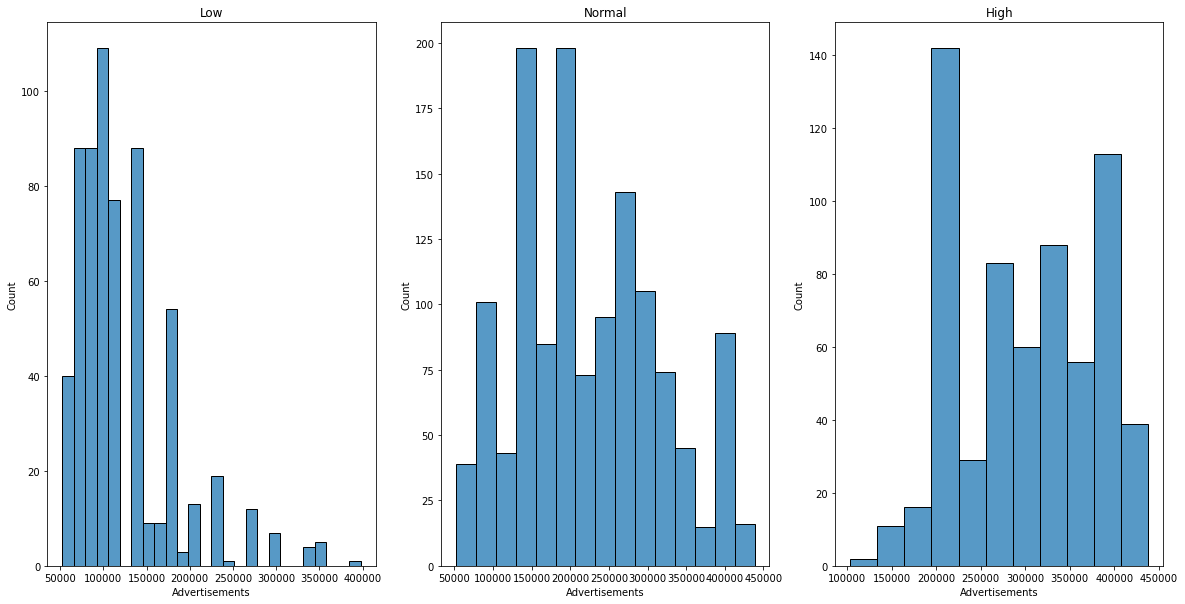

In [ ]:
# High-performance stores tend to have higher Advertisements
print("As can be seen from the graphs, the distruptions shifts from being concentrated in left, to being concentrated in the right.")
print("This means that high performing stores tend to send more advertisements.")
fig,axes = plt.subplots(1, 3, figsize=(20,10))
for ind,col in enumerate(["Low", "Normal", "High"]):
    selectedRows =  (df['Promotion'] != 'None') & (df['performance'] == col)
    sns.histplot(x="Advertisements",data=df[selectedRows],ax=axes[ind])
    axes[ind].set_title(col)
plt.show()

## Task-7

In [ ]:
# Identify the input variables that are unrelated to the profit. Use the relevant analysis approach.

# We used pearson method to calculate the correlation

corr = df.corr(method = 'pearson')
display(corr['Profit/day'].sort_values(ascending=True))
display(f'It seems the the lowest 3 variables are: Competition, Advertisements & Parking.')



Competition       0.055148
Advertisements    0.196579
Parking           0.322122
Cost/day          0.440946
Customer Base     0.735057
Customers         0.976809
Profit/day        1.000000
Name: Profit/day, dtype: float64

'It seems the the lowest 3 variables are: Competition, Advertisements & Parking.'

## Task-8

In [ ]:
# Predict the estimated profit per day for the proposed new retails stores given
# in Group_XX_b file. Note: Use all the numerical and categorical variables
# (except Store ID, Gregorian Date and Hijri Date) for the analysis. Justify your
# transformation and modification of the columns for the analysis.


# ======================== We first changed the categorical columns into numbers to use with our model. ========================

locationMapping = {"Center":2 ,
                   "Border":1 ,
                   "Outskirts": 0}


sizeMapping = {"Regular": 0,
              "Hyper": 1,
              "Grande": 2}


workHoursMapping = {"12 hrs":0,
                    "18 hrs": 1,
                    "24 hrs": 2}


promotionMapping = {"None":0,
                    "Regular":1,
                    "Grand":2}

df["Location"] = df["Location"].map(locationMapping)
df["Store Size"] = df["Store Size"].map(sizeMapping)
df["Work Hours"] = df["Work Hours"].map(workHoursMapping)
df["Promotion"] = df["Promotion"].map(promotionMapping)
df["Mall"] = df["Mall"].apply(lambda x :0 if x=="No" else 1)

dfb["Location"] = dfb["Location"].map(locationMapping)
dfb["Store Size"] = dfb["Store Size"].map(sizeMapping)
dfb["Work Hours"] = dfb["Work Hours"].map(workHoursMapping)
dfb["Promotion"] = dfb["Promotion"].map(promotionMapping)
dfb["Mall"] = dfb["Mall"].apply(lambda x :0 if x=="No" else 1)


display(df)

,Store ID,Gregorian Date,Hijri Date,Day,Greg. Month,Hijri Month,Location,Store Size,Parking,Mall,Work Hours,Cost/day,Promotion,Customer Base,Advertisements,Competition,Customers,Profit/day,performance
0,fil-3401,2009-08-12 00:00:00,1430-08-21,Wednesday,August,Sha’ban,2,1,445,1,2,55058.0,1,290397,87119,10,1916,101081.0,Low
1,fil-3402,2009-08-12 00:00:00,1430-08-21,Wednesday,August,Sha’ban,2,1,640,0,1,38610.0,2,667405,333702,8,5145,278217.0,Normal
2,fil-3403,2009-08-12 00:00:00,1430-08-21,Wednesday,August,Sha’ban,2,2,1995,0,1,648843.0,0,729725,0,6,9688,531597.0,High
3,fil-3404,2009-08-12 00:00:00,1430-08-21,Wednesday,August,Sha’ban,1,2,3125,1,1,320317.0,0,488370,0,2,6619,358109.0,Normal
4,fil-3405,2009-08-12 00:00:00,1430-08-21,Wednesday,August,Sha’ban,2,1,925,1,0,16976.0,1,452525,181010,5,5588,315909.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8010,fil-3403,2011-08-10 00:00:00,1432-09-10,Wednesday,August,Ramadhan,2,2,1995,0,1,721496.0,1,729742,291896,6,12490,618741.0,High
8013,fil-3406,2011-08-10 00:00:00,1432-09-10,Wednesday,August,Ramadhan,1,1,1645,1,2,20085.0,0,236468,0,2,3912,252590.0,Normal
8014,fil-3407,2011-08-10 00:00:00,1432-09-10,Wednesday,August,Ramadhan,2,1,870,1,0,14237.0,0,589477,0,10,7427,403844.0,Normal
8016,fil-3409,2011-08-10 00:00:00,1432-09-10,Wednesday,August,Ramadhan,1,2,3070,0,0,100639.0,1,651459,195437,1,9107,430002.0,Normal


In [ ]:
#======================== We then splitted our data into training and testing ============================================
#=============== with the date from file a being the training data, and data from file b being the testing data ==========
X_train = df.iloc[:,6:-2].values
y_train = df.iloc[:, -2].values 


X_test = dfb.iloc[:,7:-1].values
y_test = dfb.iloc[:, -1].values 



In [ ]:
#============ Then to ensure that no column will dominate the others and make it harder for our model to learn, ================
#============ we standardized the values. ======================================================================================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(np.c_[X_train,y_train])


A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]



A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]



In [ ]:
# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

#================ We then made three linear regression models, and tested them using mean squared error with our test data. ====

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

print("\n\nAfter comparing our different models using mean squared error, " +
      "We concluded that lasso regression gives better results.")

The MSE using OLS is: 0.11272631384924331
The MSE using Ridge is: 0.11272665577620397
The MSE using Lasso is: 0.112640957570613


After comparing our different models using mean squared error, We concluded that lasso regression gives better results.


In [ ]:
#================= We then inversed the scaling to get the predicted profit acquired from our lasso regression model, ==========
#================= and added the predicted profit into our dataframe for data_b. ===============================================
A_inversed = scaler.inverse_transform(np.c_[X_test,y_pred3])

dfb["Predicted_Profit"] = np.round(A_inversed[:,-1])
display(dfb)

# to see the entire dataframe, use the following code. But keep in mind that it might take a while to run.
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     display(dfb)

,0,Store ID,Gregorian Date,Hijri Date,Day,Greg. Month,Hijri Month,Location,Store Size,Parking,Mall,Work Hours,Cost/day,Promotion,Customer Base,Advertisements,Competition,Customers,Profit/day,Predicted_Profit
0,0,fil-3401,2019-03-19 00:00:00,1440-07-12,Tue,Mar,Rajab,2,2,545,1,0,223771.0,0,752755,0,7,4516,207589.0,226355.0
1,1,fil-3402,2019-03-19 00:00:00,1440-07-12,Tue,Mar,Rajab,1,1,1545,0,0,74476.0,0,230743,0,1,2968,140717.0,148678.0
2,2,fil-3403,2019-03-19 00:00:00,1440-07-12,Tue,Mar,Rajab,2,2,1490,0,0,267468.0,0,1635649,0,9,14141,659277.0,709324.0
3,3,fil-3404,2019-03-19 00:00:00,1440-07-12,Tue,Mar,Rajab,2,1,305,0,1,13808.0,1,512121,153636,9,4286,218420.0,214837.0
4,4,fil-3405,2019-03-19 00:00:00,1440-07-12,Tue,Mar,Rajab,1,1,1775,0,1,62808.0,1,248104,148862,4,2423,124319.0,121354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,3955,fil-3406,2020-04-17 00:00:00,1441-08-24,Fri,Apr,Sha’ban,2,0,255,1,0,8333.0,1,278758,83627,10,3010,152528.0,150809.0
3956,3956,fil-3407,2020-04-17 00:00:00,1441-08-24,Fri,Apr,Sha’ban,1,1,1530,0,2,60971.0,0,225812,0,1,5213,253273.0,261329.0
3957,3957,fil-3408,2020-04-17 00:00:00,1441-08-24,Fri,Apr,Sha’ban,2,0,275,0,0,6433.0,2,173486,104091,11,3000,133889.0,150330.0
3958,3958,fil-3409,2020-04-17 00:00:00,1441-08-24,Fri,Apr,Sha’ban,2,2,1670,0,1,455875.0,0,1987351,0,7,15242,720989.0,764571.0
